Model 1 - Simple CNN Model

This implementation follows a traditional CNN design with stacked convolutional layers and no residual connections, focusing on a straightforward path through the network. I explain in subsequent models why I chose to make the improvements I did and Model 1 acts as a "base" to compare the rest off. 

- **Architecture**: Sequential CNN with three convolutional blocks (no residual connections)

- **Filter Progression**: 32→64→128 channels with two convolutions per block

- **Pooling**: MaxPooling after each block for downsampling

- **Regularization**: Dropout (0.25) after each pooling layer, BatchNormalization after each convolution

- **Data Augmentation**: None. Image scaling is also a simple divide by 255 instead of any normalisation. 

- **Optimization**: Standard Adam optimizer with default learning rate

- **Parameters**: Comparable number of filters but simpler architecture without skip connections. Batch size 32. 


Notable Results (Validation Set):

*   Early Stopping at 31 Epochs
*   Average Loss: 0.524
*   Top 1 Error-rate: 0.173
*   Top 5 Error-rate: 0.010













In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)


In [ ]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_k_categorical_accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

early_stop = EarlyStopping(monitor='val_accuracy', patience=7)


In [8]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=50,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test),
              callbacks=[early_stop]
             )


Epoch 1/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 60s 31ms/step - accuracy: 0.3902 - loss: 1.7176 - precision: 0.5511 - recall: 0.1893 - top_k_categorical_accuracy: 0.8682 - val_accuracy: 0.6028 - val_loss: 1.1280 - val_precision: 0.7254 - val_recall: 0.4839 - val_top_k_categorical_accuracy: 0.9571
Epoch 2/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.6250 - loss: 1.1653 - precision: 0.7500 - recall: 0.3750 - top_k_categorical_accuracy: 1.0000 - val_accuracy: 0.6025 - val_loss: 1.1240 - val_precision: 0.7263 - val_recall: 0.4837 - val_top_k_categorical_accuracy: 0.9575
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 66s 26ms/step - accuracy: 0.6004 - loss: 1.1203 - precision: 0.7393 - recall: 0.4656 - top_k_categorical_accuracy: 0.9567 - val_accuracy: 0.6178 - val_loss: 1.1277 - val_precision: 0.7127 - val_recall: 0.5275 - val_top_k_categorical_accuracy: 0.9551
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 924us/step - accuracy: 0.4688 - loss: 1.3414 - precision: 0.5455 - recall: 0.37

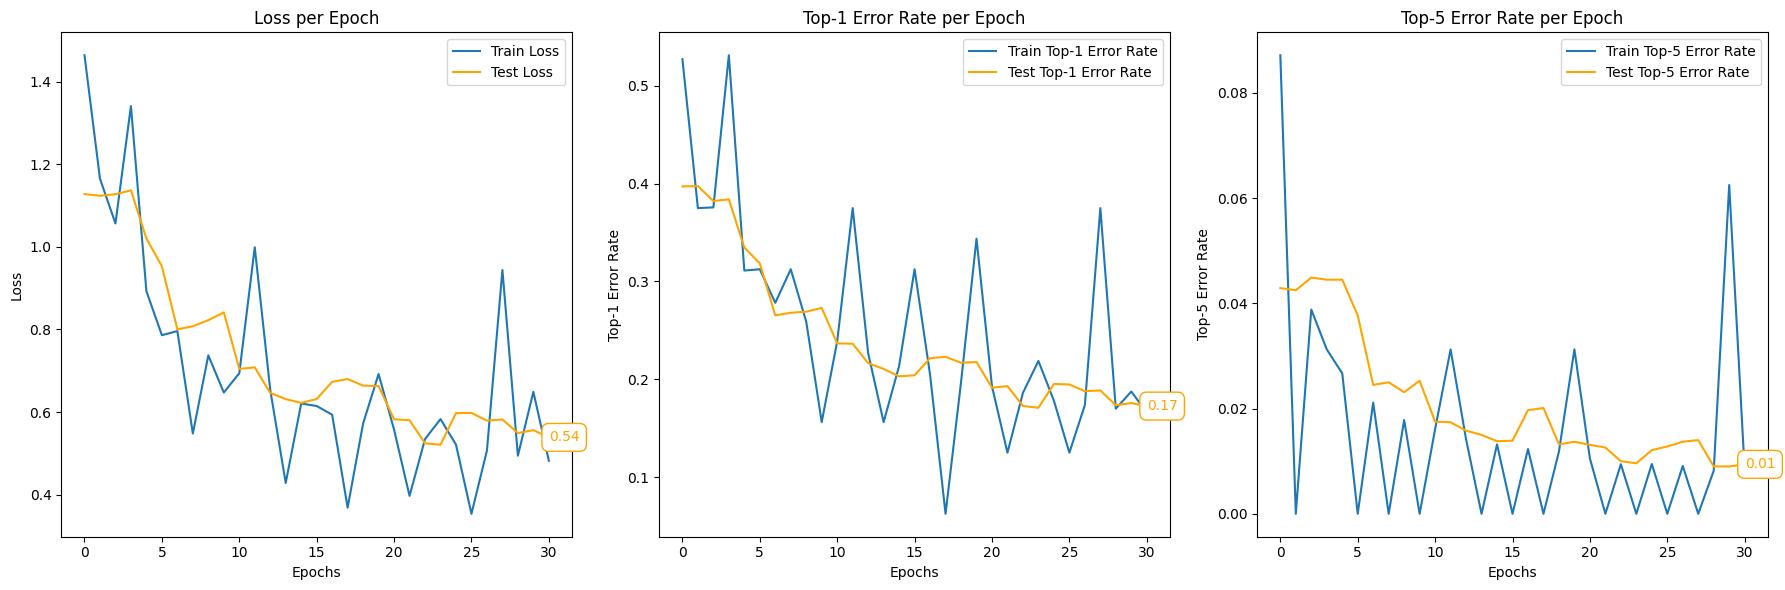

In [ ]:
orange_color = '#FFA500'

# Plotting the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Loss
axes[0].plot(train_loss, label='Train Loss')
axes[0].plot(val_loss, label='Test Loss', color=orange_color)
axes[0].set_title('Loss per Epoch')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
# Display the last value of test loss with 2 decimal places in a curved box with the orange color
axes[0].text(len(val_loss)-1, val_loss[-1], f'{val_loss[-1]:.2f}', color=orange_color, va='center',
             bbox=dict(facecolor='white', edgecolor=orange_color, boxstyle='round,pad=0.5'))

# Plot 2: Top-1 Error Rate
axes[1].plot(train_top1_error, label='Train Top-1 Error Rate')
axes[1].plot(val_top1_error, label='Test Top-1 Error Rate', color=orange_color)  # Using the defined orange color
axes[1].set_title('Top-1 Error Rate per Epoch')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Top-1 Error Rate')
axes[1].legend()
# Display the last value of test top-1 error rate with 2 decimal places in a curved box with the orange color
axes[1].text(len(val_top1_error)-1, val_top1_error[-1], f'{val_top1_error[-1]:.2f}', color=orange_color, va='center',
             bbox=dict(facecolor='white', edgecolor=orange_color, boxstyle='round,pad=0.5'))

# Plot 3: Top-5 Error Rate
axes[2].plot(train_top5_error, label='Train Top-5 Error Rate')
axes[2].plot(val_top5_error, label='Test Top-5 Error Rate', color=orange_color)  # Using the defined orange color
axes[2].set_title('Top-5 Error Rate per Epoch')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Top-5 Error Rate')
axes[2].legend()
# Display the last value of test top-5 error rate with 2 decimal places in a curved box with the orange color
axes[2].text(len(val_top5_error)-1, val_top5_error[-1], f'{val_top5_error[-1]:.2f}', color=orange_color, va='center',
             bbox=dict(facecolor='white', edgecolor=orange_color, boxstyle='round,pad=0.5'))

# Show plots
plt.tight_layout()
plt.show()
